In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

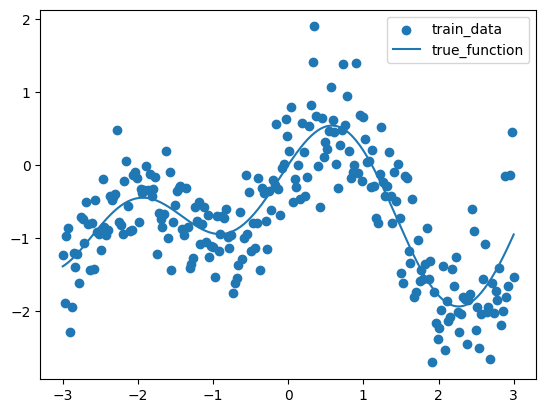

In [3]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [18]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)
M = X.shape[1]

In [19]:
def posterior_mean(X, y, alpha, lamb):
  posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)
  posterior_cov = np.linalg.inv(posterior_cov_inv)
  mean = alpha * posterior_cov @ (X.T @ y)
  return posterior_cov, mean

In [20]:
posterior_cov, mean_base = posterior_mean(X, y, alpha, lamb)

x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean_base
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

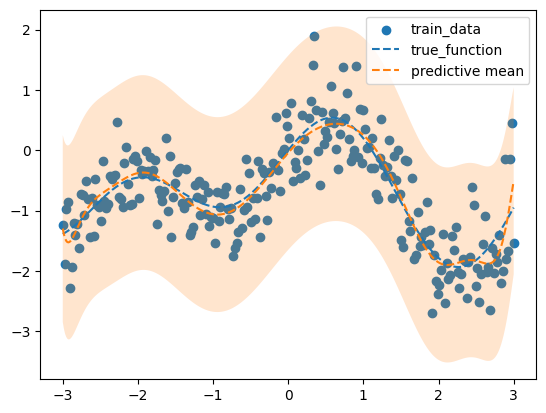

In [21]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [10]:
def log_evidence(lamb, X, y, alpha):
  N = X.shape[0]
  tau2 = alpha / lamb
  C = alpha * np.eye(N) + tau2 * (X @ X.T)

  sign, logdetC = np.linalg.slogdet(C)
  logev = -0.5 * (N * np.log(2 * np.pi) + logdetC + y.T @ np.linalg.solve(C, y))
  return logev


In [14]:
lambdas = np.logspace(-6, 3, 160)
log_evs = np.array([log_evidence(i, X, y, sigma**2) for i in lambdas])

best_lamb = lambdas[np.argmax(log_evs)]
print(f"Лучшая λ по evidence: {best_lamb:.4f}")

Лучшая λ по evidence: 0.0568


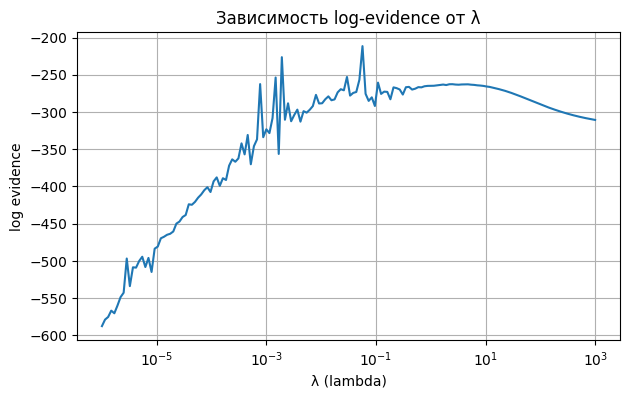

In [16]:
plt.figure(figsize=(7, 4))
plt.semilogx(lambdas, log_evs)
plt.xlabel("λ (lambda)")
plt.ylabel("log evidence")
plt.title("Зависимость log-evidence от λ")
plt.grid(True)
plt.show()

In [23]:
posterior_cov_best, mean_best = posterior_mean(X, y, alpha, best_lamb)
mean_pred_best = X_new @ mean_best

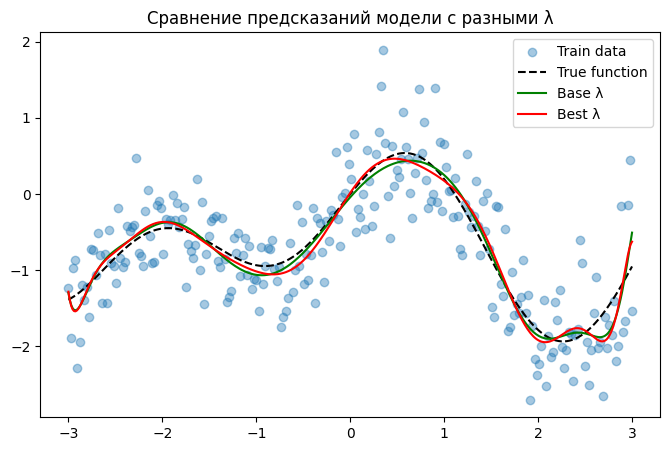

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.4, label="Train data")
plt.plot(x_new, f_true(x_new), "k--", label="True function")
plt.plot(x_new, mean_pred, label="Base λ", color='g')
plt.plot(x_new, mean_pred_best, label="Best λ", color='r')
plt.legend()
plt.title("Сравнение предсказаний модели с разными λ")
plt.show()